<a href="https://colab.research.google.com/github/adesrimeilani/Pemrograman_Python/blob/main/ADE%20SRI%20MEILANI.M__1101184057_TT-42-07_TUGAS%20BESAR%20SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ade Sri Meilani M.

Nim : 1101184057

Kelas : TT-42-07

Skenario Perancangan FTTB

Sentral - ODC - ONU - ODP - Roset. Hotel Claro Makassar memiliki 16 lantai, setiap lantai terdapat 10 kamar. Dengan rencana tersebut saya akan menggunakan 4 konektor dan 2 spliter, dengan spliter 1:64 dengan redaman 18.5 dB untuk ONU ke ODP dan spliter 1:32 dengan redaman 16 dB untuk ODP ke Roset. saya menggunakan fiber jenis G652D dengan panjang gelombang 1550 nm dengan redaman 0.2 dB/Km. Selain itu, dengan jumlah konektor terdapat 4 dan splitter 2, maka splicer ada 6 buah yang memiliki redaman 0.2 db.









In [3]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.85 #Responsivitas (A/W)
SM = 6   #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 90*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 300 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#Parameter Pr
#jarak dari sentral ke ONU = 20 km
#jarak dari ONU ke Roset = <500 m --> 7*16 = 112 m 
#jarak total = 20000 + 122 = 20112 m

d = np.arange(0.112,20.113,1) #Jarak (km)
L_fiber = 0.2 #0.2 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 6 #Jumlah Splicer
L_splicer = 0.2 #Loss dari splicer (db)
N_connector = 4 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 16 + 18.5 #loss dari splitter (dB) diambil redaman yang paling kecil, milik 1:32
Pt = 3 #Daya tx (dBm)

In [5]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-39.9224 -40.1224 -40.3224 -40.5224 -40.7224 -40.9224 -41.1224 -41.3224
 -41.5224 -41.7224 -41.9224 -42.1224 -42.3224 -42.5224 -42.7224 -42.9224
 -43.1224 -43.3224 -43.5224 -43.7224 -43.9224]


In [6]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [8.65324352e-05 8.26378340e-05 7.89185188e-05 7.53666004e-05
 7.19745446e-05 6.87351565e-05 6.56415648e-05 6.26872078e-05
 5.98658186e-05 5.71714130e-05 5.45982755e-05 5.21409483e-05
 4.97942191e-05 4.75531100e-05 4.54128675e-05 4.33689518e-05
 4.14170274e-05 3.95529541e-05 3.77727780e-05 3.60727229e-05
 3.44491829e-05]


In [7]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [3.96107918e-10 3.61254714e-10 3.29468215e-10 3.00478584e-10
 2.74039725e-10 2.49927200e-10 2.27936315e-10 2.07880390e-10
 1.89589169e-10 1.72907377e-10 1.57693402e-10 1.43818092e-10
 1.31163659e-10 1.19622679e-10 1.09097180e-10 9.94978104e-11
 9.07430816e-11 8.27586740e-11 7.54768077e-11 6.88356668e-11
 6.27788742e-11]


In [8]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[21.7271467  21.32800747 20.92882966 20.52961499 20.13036511 19.73108158
 19.33176592 18.93241956 18.53304388 18.13364017 17.73420971 17.33475369
 16.93527324 16.53576947 16.13624341 15.73669608 15.33712841 14.93754133
 14.5379357  14.13831235 13.73867209]


In [9]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[6.09996495 5.82599863 5.56431218 5.31435735 5.07561018 4.84756994
 4.6297581  4.4217174  4.22301086 4.03322094 3.85194866 3.6788128
 3.5134491  3.35550954 3.20466159 3.06058756 2.92298391 2.79156067
 2.66604079 2.5461596  2.43166424]


In [10]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.27192439e-07 6.22289106e-07 2.63804330e-06 9.81256955e-06
 3.23944300e-05 9.59147214e-05 2.57140767e-04 6.29663081e-04
 1.41953848e-03 2.96780773e-03 5.79223799e-03 1.06169534e-02
 1.83775484e-02 3.01919494e-02 4.72934759e-02 7.09306489e-02
 1.02245964e-01 1.42150897e-01 1.91215601e-01 2.49589022e-01
 3.16959566e-01]


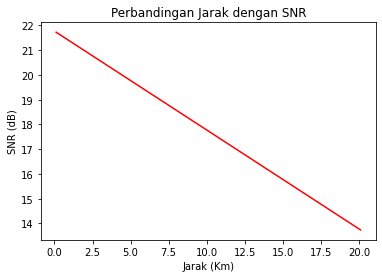

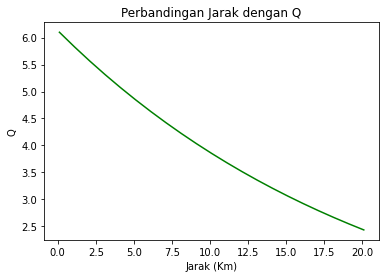

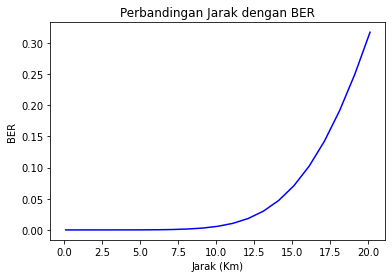

In [11]:
#GRAFIK
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()